# Data Story: Visualizations and EDA

In this part of the capstone project, the different variables of the dataset will be explored. They will be plotted against each others to see what type of potential correlations or trends can be found through the visualizations.

The cleaned dataframe will be imported and inspected. Seaborn settings will be initiated.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.3)

df = pd.read_csv("data\Clean_Video_Game_Sales.csv", index_col=0)
df.head()

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Sports,2006,Nintendo,82.53,76.0,80.0
1,Grand Theft Auto V,Action,2013,Take-Two Interactive,56.57,97.0,83.0
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0
3,Wii Sports Resort,Sports,2009,Nintendo,32.77,80.0,80.0
4,Call of Duty: Modern Warfare 3,Shooter,2011,Activision,30.59,88.0,34.0


The dataframe's info and describe method will be called as part of the exploratory data analysis.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 0 to 4427
Data columns (total 7 columns):
Name               4428 non-null object
Genre              4428 non-null object
Year_of_Release    4428 non-null int64
Publisher          4428 non-null object
Global_Sales       4428 non-null float64
Critic_Score       4428 non-null float64
User_Score         4428 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 276.8+ KB


In [25]:
df.describe()

,Year_of_Release,Global_Sales,Critic_Score,User_Score
count,4428.000000,4428.000000,4428.000000,4428.000000
mean,2007.011292,1.201136,70.453704,74.336721
std,4.294223,2.877575,14.049812,13.668565
min,1985.000000,0.010000,19.000000,7.000000
25%,2004.000000,0.130000,62.000000,68.000000
50%,2007.000000,0.380000,73.000000,78.000000
75%,2010.000000,1.170000,81.000000,84.000000
max,2016.000000,82.530000,98.000000,96.000000


## Questions to explore
Looking at the intial information for the dataset, a set of questions to look at was constructed. Each question will be explored and any observations or potential inferences and insights will be stated.  
1. What does critic/user scores and global sales look like?   
2. How does genre affect global sales?  
3. How much better do popular publishers perform?  
4. Is there a correlation between count of genre per publisher?    
5. How do count of games per publisher relate to global sales?    
6. Which publishers have the highest average ratings?    
7. How many unique games, with metacritic ratings, are sold globally each year?  

## 1. What does critic/user scores and global sales look like?
Exploring the data it can be seen that there are outliers in the global sales of video games. These outliers will affect how the plot of Metacritic scores and global sales will look. Lets remove them and plot the visualizations.  

In [40]:
#checking for outliers and their indices
df[['Name','Global_Sales']].sort_values('Global_Sales', ascending=False).head(4)

,Name,Global_Sales
0,Wii Sports,82.53
1,Grand Theft Auto V,56.57
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77


"Wii Sports" and "Grand Theft Auto V" will be removed by index for this initial plotting.

In [38]:
#removed by index for wii sports and grand theft auto
#stored the dataFrame in a new variable
no_outliers = df.drop([0,1],axis=0)
no_outliers.head(3)

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0
3,Wii Sports Resort,Sports,2009,Nintendo,32.77,80.0,80.0
4,Call of Duty: Modern Warfare 3,Shooter,2011,Activision,30.59,88.0,34.0


### Observing the visualizations for question 1
By looking at the plots below, it can be seen that a trend exists. 
The higher the scores, the higher the global sales tend to be.

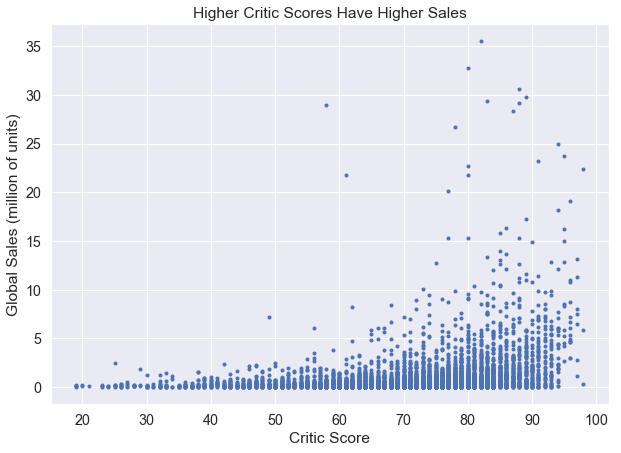

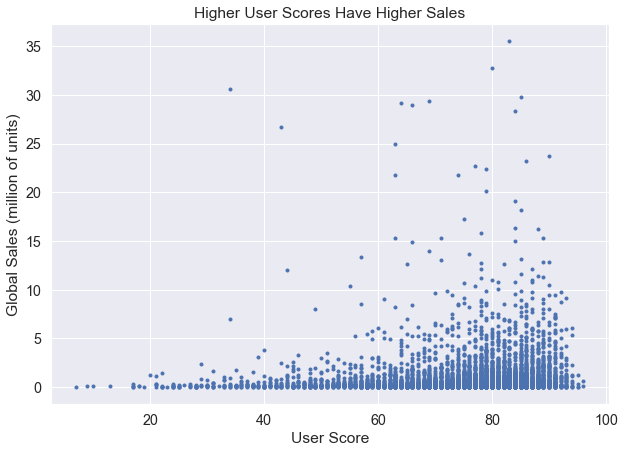

In [30]:
#Plotting Critic Score versus Global Sales
plt.plot('Critic_Score', 'Global_Sales', data=no_outliers, marker='.', linestyle='none')
plt.title('Higher Critic Scores Have Higher Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (million of units)')
plt.show()

#Plotting User Score versus Global Sales
plt.plot('User_Score', 'Global_Sales', data=no_outliers, marker='.', linestyle='none')
plt.title('Higher User Scores Have Higher Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales (million of units)')
plt.show()

## 2. How does genre affect global sales?
In order to see this, the dataset will first need to be filtered and grouped by the various video game genre. Using the unique method on a pandas series will return all the unique values of that column.

In [31]:
#Checking for all unique genres
df.Genre.unique()

array(['Sports', 'Action', 'Racing', 'Shooter', 'Platform', 'Misc',
       'Role-Playing', 'Puzzle', 'Simulation', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

There are 12 genres that video games could be categorized under. The dataset will now be grouped by genre with an aggregation on the sum total of global sales. The data will be sorted by ascending global sales.

In [32]:
#aggregating the global sales by genre
col = ['Genre','Global_Sales']
df_genre = df[col].groupby('Genre').sum().sort_values('Global_Sales')
df_genre

,Global_Sales
Genre,
Strategy,70.09
Puzzle,78.90
Adventure,81.52
Simulation,204.25
Fighting,250.02
Platform,377.80
Misc,417.11
Racing,478.61
Role-Playing,502.14


### Observing the visualization for question 2
It is clearly seen that action games sell the most, at nearly 300 million units over the the next best two selling genre. This observation could be explored further to see what may have caused the large global sales for action video games.

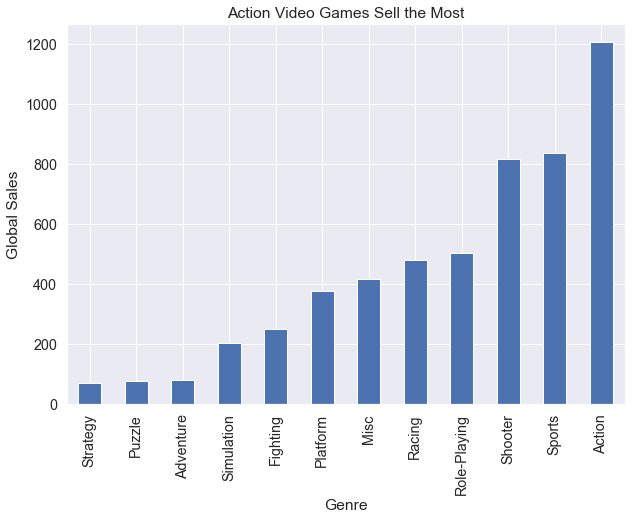

In [35]:
df_genre.plot(kind='bar', legend=False)
plt.ylabel('Global Sales')
plt.title('Action Video Games Sell the Most')
plt.show()

## 3. How much better do popular publishers perform?
There are 315 different video game publishers in this dataset. Only the top 10 publishers who released the most games will be looked at for this initial analysis.

In [58]:
top_publishers = df.Publisher.value_counts()
top_publishers.head(10), print("Amount of different publishers:", len(top_publishers))

Amount of different publishers: 315


(Electronic Arts                 393
 Nintendo                        290
 Sony Computer Entertainment     282
 Ubisoft                         277
 Activision                      210
 Sega                            186
 Namco Bandai Games              179
 THQ                             175
 Konami Digital Entertainment    175
 Capcom                          132
 Name: Publisher, dtype: int64, None)

The top 10 publisher names were extracted from the value counts series and stored in an array. The array was then used to filter the dataset by the top 10 publishers.

In [59]:
#storing the array of publisher names to a variable
top10_publishers = top_publishers.head(10).index.values

#filtered the dataframe by the top 10 publishers
df_top10 = df[df['Publisher'].isin(top10_publishers)]
df_top10.head()

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Sports,2006,Nintendo,82.53,76.0,80.0
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0
3,Wii Sports Resort,Sports,2009,Nintendo,32.77,80.0,80.0
4,Call of Duty: Modern Warfare 3,Shooter,2011,Activision,30.59,88.0,34.0
5,New Super Mario Bros.,Platform,2006,Nintendo,29.80,89.0,85.0


To create a visualization between publishers and global sales, the data set needs to be grouped by publishers and an aggregation on the sum of global sales. 

In [62]:
#aggregating sum of global sales by publisher
col=['Publisher', 'Global_Sales']
top10 = df_top10[col].groupby('Publisher').sum().sort_values('Publisher')
top10

,Global_Sales
Publisher,
Activision,518.92
Capcom,112.96
Electronic Arts,859.26
Konami Digital Entertainment,138.82
Namco Bandai Games,119.33
Nintendo,850.04
Sega,149.09
Sony Computer Entertainment,383.43
THQ,161.51


### Observing the visualization for question 3
Both a pie chart and a bar graph will be looked at for the same data to see the differences in visualization methods. It is much harder to see the differences in the publishers in a pie chart than it is in a bar graph. Through the bar graph, it can be seen that both Nintendo and EA are the top selling publishers among the top 10 most popular. They perform better by nearly 200 million units sold over the next highest seller.

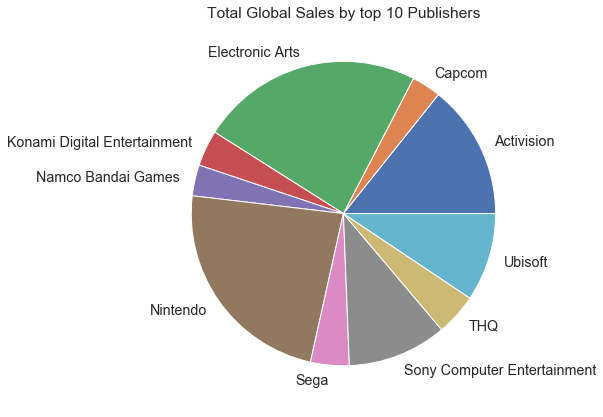

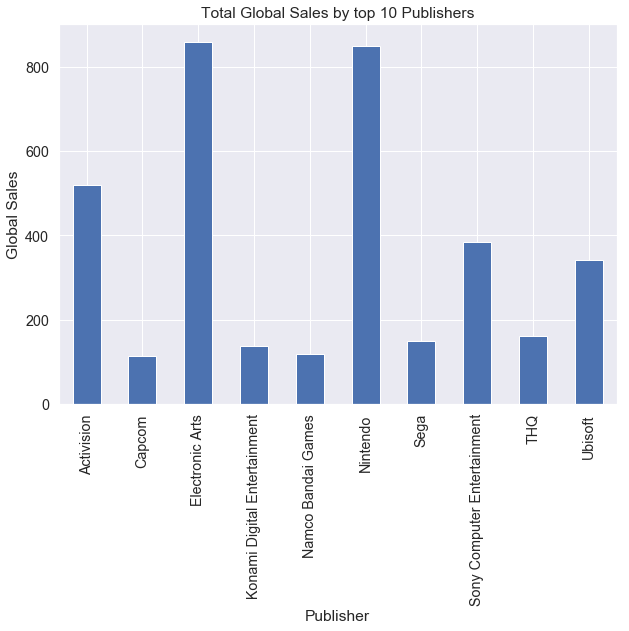

In [63]:
top10.plot.pie(y='Global_Sales', legend=False, title="Total Global Sales by top 10 Publishers")
plt.ylabel('')
plt.show()
top10.plot(kind='bar', title='Total Global Sales by top 10 Publishers', legend=False)
plt.ylabel('Global Sales')
plt.show()

## 4. Is there a correlation between count of genre per publisher?
The previous question took a look at the count of video games produced per publisher. This question will explore which genres some publishers tended to produce. The top 5 most popular publishers and their video game genre counts will be looked at.

The dataset will be grouped by publisher and genre, forming a multilevel index. The count of each genre will also be aggregated, using the pandas size method.

In [64]:
#creating a multilevel index for publisher and genre
top5_publishers = top_publishers.head(5).index.values
df_top5 = df[df.Publisher.isin(top5_publishers)]
col = ['Publisher', 'Genre']
genre_count = df_top5[col].groupby(['Publisher', 'Genre']).size()
genre_count.head(25)

Publisher        Genre       
Activision       Action           60
                 Fighting          3
                 Misc             21
                 Platform         12
                 Puzzle            1
                 Racing           13
                 Role-Playing     18
                 Shooter          38
                 Simulation        5
                 Sports           31
                 Strategy          8
Electronic Arts  Action           44
                 Adventure         6
                 Fighting         12
                 Misc              9
                 Platform          4
                 Puzzle            5
                 Racing           43
                 Role-Playing     12
                 Shooter          52
                 Simulation       43
                 Sports          156
                 Strategy          7
Nintendo         Action           37
                 Adventure        17
dtype: int64

In order to plot the data, the DataFrame indices will need to be unstacked. Pandas provides an unstacking method.

In [68]:
#unstacking so that the each publisher can be visualized for each genre
genre_count_unstack = genre_count.unstack('Publisher')
genre_count_unstack

Publisher,Activision,Electronic Arts,Nintendo,Sony Computer Entertainment,Ubisoft
Genre,,,,,
Action,60.0,44.0,37.0,52.0,66.0
Adventure,NaN,6.0,17.0,16.0,15.0
Fighting,3.0,12.0,6.0,9.0,12.0
Misc,21.0,9.0,40.0,26.0,27.0
Platform,12.0,4.0,41.0,30.0,17.0
Puzzle,1.0,5.0,24.0,3.0,1.0
Racing,13.0,43.0,15.0,33.0,17.0
Role-Playing,18.0,12.0,50.0,22.0,26.0
Shooter,38.0,52.0,11.0,33.0,43.0


### Observing the visualization for question 4
The most noticeable aspect of the visualization is that there is a very large amount of sports games produced by EA. After zooming in on the graph, it can be seen that action videos games tend to be published more. This shows that there may be some variation in the distribution of genres for video games.

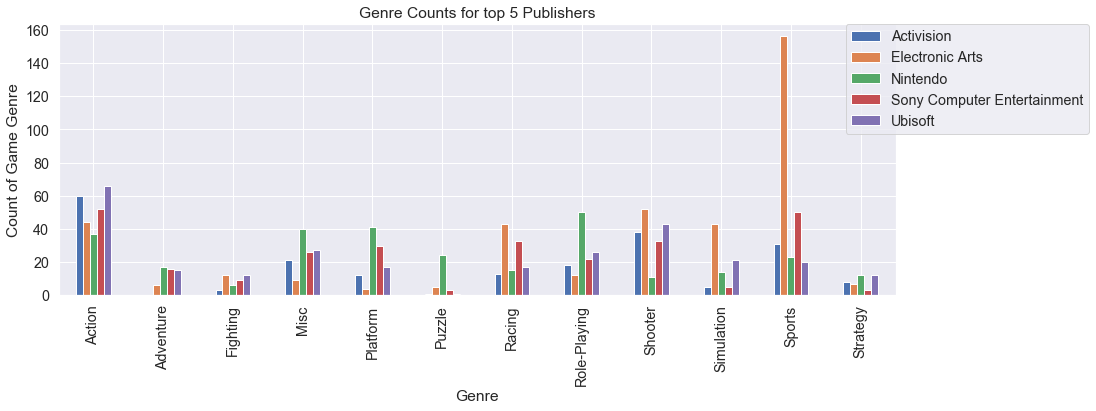

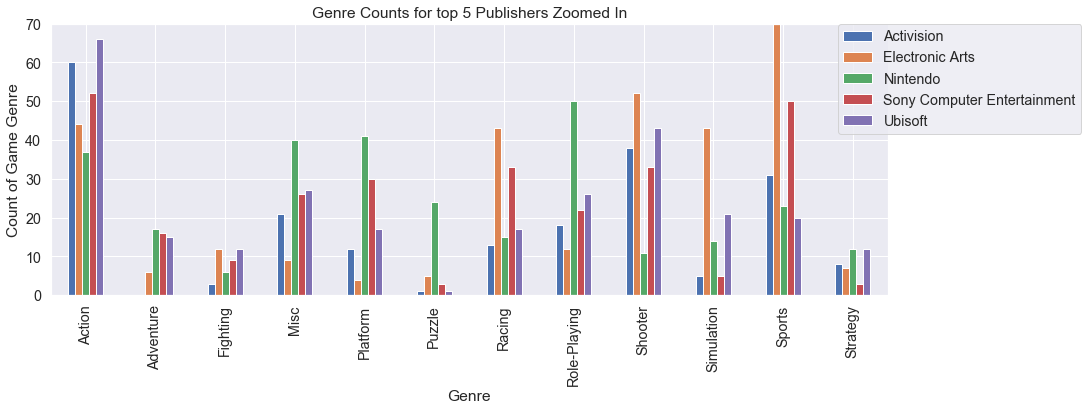

In [69]:
#plotting a bar chart of count of genres per publisher
genre_count_unstack.plot(kind='bar', figsize=(15,5))
plt.title('Genre Counts for top 5 Publishers')
plt.legend(loc='upper right', bbox_to_anchor=(1.24, 1.025))
plt.ylabel('Count of Game Genre')
plt.show()
#zoomed in on graph
genre_count_unstack.plot(kind='bar', figsize=(15,5))
plt.title('Genre Counts for top 5 Publishers Zoomed In')
plt.legend(loc='upper right', bbox_to_anchor=(1.24, 1.025))
plt.ylabel('Count of Game Genre')
plt.ylim(0, 70)
plt.show()

## 5. How do count of games per publisher relate to global sales?
Each publisher will be plotted for their total amount of games published against their total global sales.

The data was grouped by publisher and aggregated on the sum of global sales and the count of video games.

In [70]:
#grouped by publisher with aggregations on the count of publishers and their sum of global sales
col = ['Publisher', 'Global_Sales']
df_counts = df[col].groupby(['Publisher']).agg(['size','sum'])
#renamed the columns
df_counts.columns = ['Count', 'Global_Sales']
df_counts.head()

,Count,Global_Sales
Publisher,,
10TACLE Studios,1,0.02
1C Company,3,0.10
2D Boy,1,0.04
3DO,12,2.24
505 Games,58,31.73


### Observing the visualization for question 5
There is an obvious trend between count of games per publishers and their total global sales. The more video games a publisher releases, the more they sell.

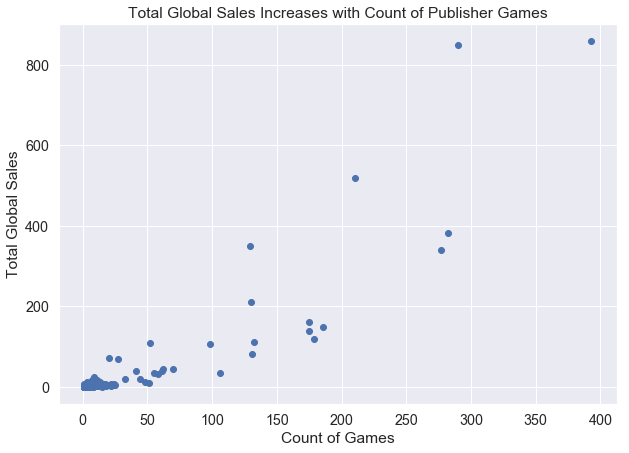

In [72]:
plt.scatter(x=df_counts['Count'], y=df_counts['Global_Sales'])

plt.title('Total Global Sales Increases with Count of Publisher Games')
plt.xlabel('Count of Games')
plt.ylabel('Total Global Sales')
plt.show()

## 6. Which publishers have highest average ratings?
Once again, only the top 10 publishers will be observed. Their average scores on Metacritic, for both critic and user scores, will be looked at.

The dataset will be grouped by publisher with aggregations on the mean of both critic and user scores.

In [73]:
col=['Publisher', 'Critic_Score', 'User_Score']
top10_scores = df_top10[col].groupby('Publisher').mean().sort_values('Publisher')
top10_scores

,Critic_Score,User_Score
Publisher,,
Activision,71.704762,73.880952
Capcom,72.643939,76.871212
Electronic Arts,76.590331,75.267176
Konami Digital Entertainment,70.177143,75.422857
Namco Bandai Games,67.290503,74.603352
Nintendo,76.120690,79.127586
Sega,72.973118,76.451613
Sony Computer Entertainment,75.216312,77.124113
THQ,69.297143,74.862857


### Observing the visualization for question 6
Nintendo has the highest user score of the top 10 publishers. It also looks like Nintendo, EA, and Take-Two Interactive scored similarly in critic scores. This bar chart also shows that users tend to give higher ratings over critics with Electronic Arts being an exception. 

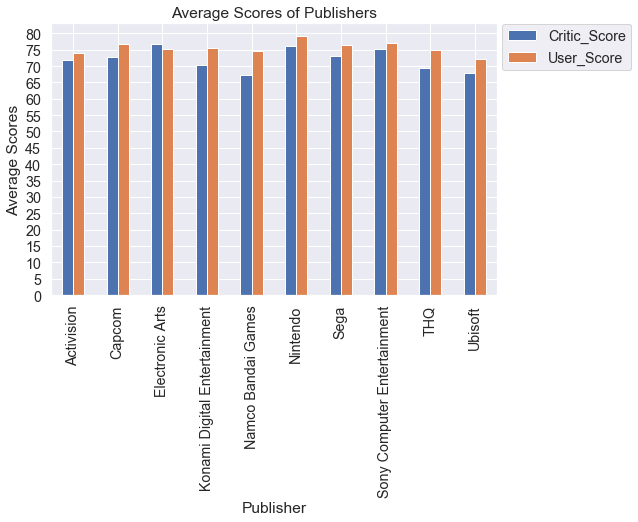

In [74]:
top10_scores.plot(kind='bar', figsize=(8,5))

plt.ylabel('Average Scores')
plt.yticks(np.arange(0,85, step=5))
plt.legend(loc='upper left', bbox_to_anchor=(0.995,1.025))
plt.title('Average Scores of Publishers')
plt.show()

## 7. How many unique games, with metacritic ratings, are sold globally each year?
The current DataFrame only contains video games released from 1985 to 2016 that has both critic and user Metacritic ratings.

In order to visualize the amount of games released each year, the dataset would need to be grouped by year of release with an aggregation on the count of games.

In [83]:
#using pandas size method to get a count of video games
col=['Year_of_Release']
count_of_games = df[col].groupby('Year_of_Release').size()

count_of_games.head(), count_of_games.tail()

(Year_of_Release
 1985     1
 1988     1
 1994     1
 1996     7
 1997    14
 dtype: int64, Year_of_Release
 2012    179
 2013    143
 2014    137
 2015    133
 2016    126
 dtype: int64)

### Observing the visualization for question 7
The count of games sky-rocketed in about year 2001 and started to drop around year 2009. This is something that could be investigated further.

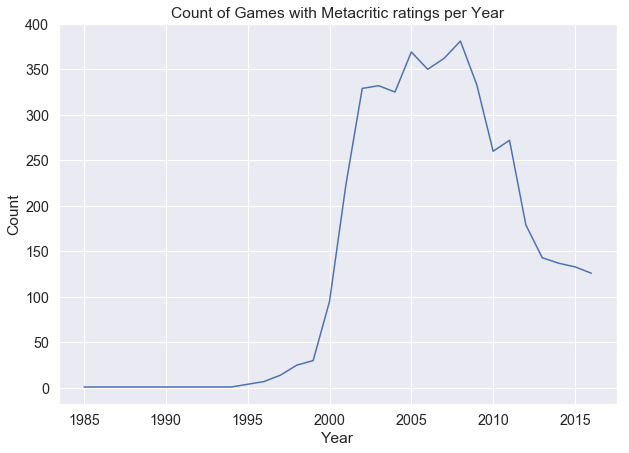

In [85]:
#plotting time series of count of games per year
plt.plot(count_of_games)

plt.title('Count of Games with Metacritic ratings per Year')
plt.ylabel('Count')
plt.xlabel('Year')

plt.show()

To check which years the count of games values jumped and started to drop, the dataset can be filtered between the interested dates.

In [86]:
#observing the years
count_of_games.loc['1999':'2011']

Year_of_Release
1999     30
2000     95
2001    223
2002    329
2003    332
2004    325
2005    369
2006    350
2007    362
2008    381
2009    333
2010    260
2011    272
dtype: int64

## Summary
1. What does critic/user scores and global sales look like?  
    -Higher scores tend to have higher sales  
2. How does genre affect global sales?  
    -Action video games sell the most  
3. How much better do popular publishers perform?  
    -It looks like Nintendo and EA are the top sellers 
4. Find a correlation between count of genre per publisher  
    -Looks like action games are consistently the top published genre for the top 5 publishers. EA produces the most sports games by a very large amount.    
5. How do count of games per publisher relate to global sales?    
    -Looks like there is a positive trend in count of games and total global sales  
6. Which publishers have the highest average ratings?  
    -Nintendo has the highest score for users. EA and Nintendo scored similarly for critics  
7. How many unique games, with metacritic ratings, are sold globally each year?  
    -The count sky-rocketed in 2001 and started to drop in 2009  